Labwork 1: Gradient Descend
* Implement (from scratch!) gradient descend to find
minimum value of a given function f(x) and its first order
derivative f_()
* Print the intermediate iterative steps, similar to the previous
table (time, x, f(x))
* Try experimenting with the previous example f(x) = x**2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def test_function(x):
    return x**2

def df(x):
    return 2*x
    
def gradient_descent(starting_point, learning_rate = 0.1, num_iterations=20):
    x = starting_point
    iteration = 0
    history = []
    
    while iteration < num_iterations:
        gradient = df(x)
        history.append({'iteration': iteration, 'x': x, 'gradient': gradient})
        iteration += 1
        x = x - learning_rate * gradient
        
    result = pd.DataFrame(history)
    result['f(x)'] = test_function(result['x'])
    return result

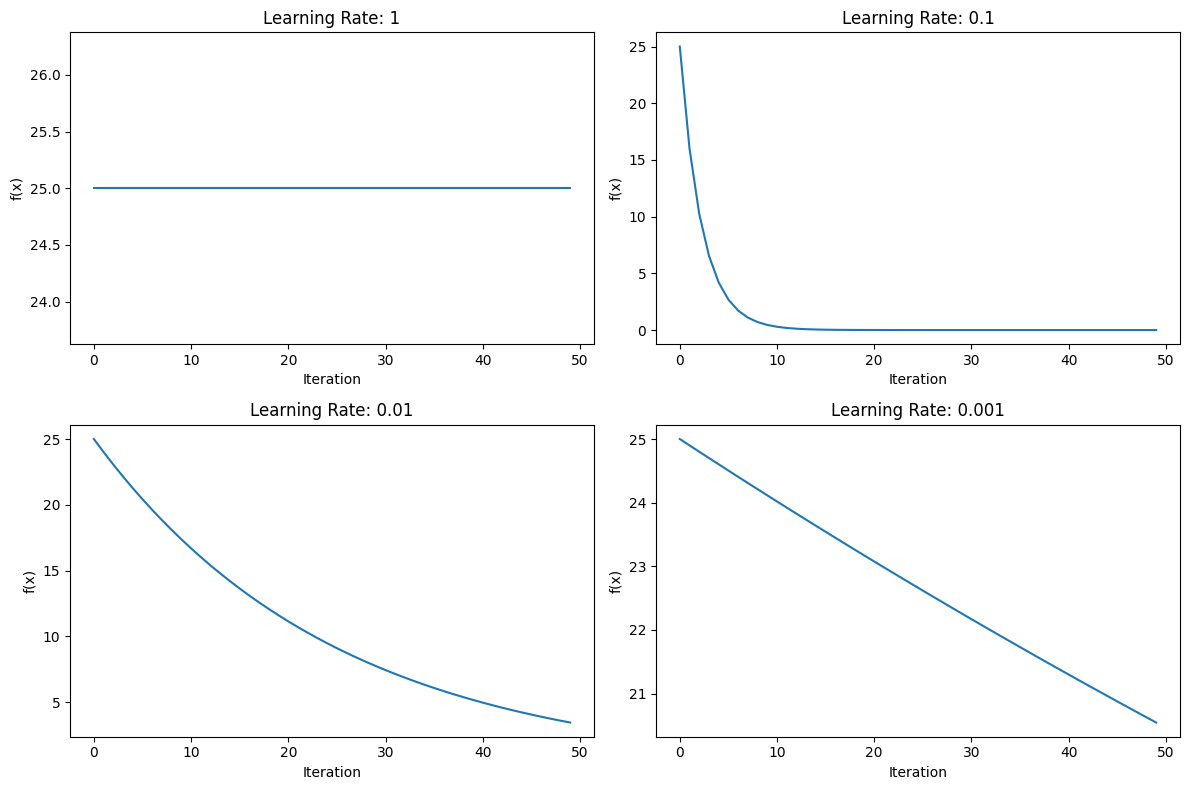

     iteration         x   gradient       f(x)  learning_rate
0            0  5.000000  10.000000  25.000000          1.000
1            1 -5.000000 -10.000000  25.000000          1.000
2            2  5.000000  10.000000  25.000000          1.000
3            3 -5.000000 -10.000000  25.000000          1.000
4            4  5.000000  10.000000  25.000000          1.000
..         ...       ...        ...        ...            ...
195         45  4.569244   9.138488  20.877992          0.001
196         46  4.560106   9.120211  20.794563          0.001
197         47  4.550985   9.101971  20.711468          0.001
198         48  4.541883   9.083767  20.628705          0.001
199         49  4.532800   9.065599  20.546273          0.001

[200 rows x 5 columns]


In [12]:
if __name__ == "__main__":
    starting_point = 5
    learning_rate = [1, 0.1, 0.01, 0.001]
    num_iterations = 50
    
    result = pd.DataFrame()
    for lr in learning_rate:
        res = gradient_descent(starting_point, lr, num_iterations)
        res['learning_rate'] = lr
        result = pd.concat([result, res], ignore_index=True)
    
    # use seaborn to plot the results as 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    for i, lr in enumerate(learning_rate):
        ax = axes[i // 2, i % 2]
        sns.lineplot(data=result[result['learning_rate'] == lr], x='iteration', y='f(x)', ax=ax)
        ax.set_title(f'Learning Rate: {lr}')
        ax.set_xlabel('Iteration')
        ax.set_ylabel('f(x)')
    plt.tight_layout()
    plt.show()
    
    print(result)